<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/Tarea_SVM_Clases_No_Balanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


## 🔧 Instrucciones
5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.


## 📁 Entregables


1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características.


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
breast_can = load_breast_cancer()
df = pd.DataFrame(breast_can.data, columns=breast_can.feature_names)
df["target"] = breast_can.target

In [3]:
print(df["target"].value_counts())

target
1    357
0    212
Name: count, dtype: int64


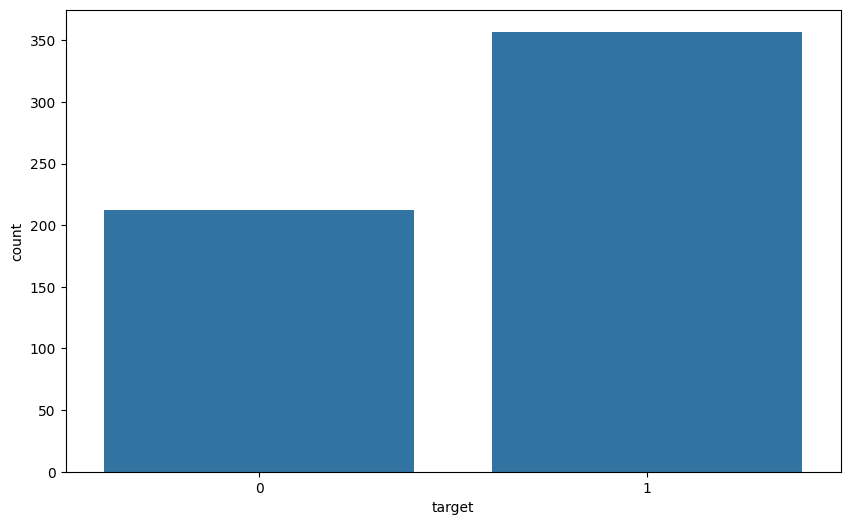

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x="target", data=df)
plt.show()

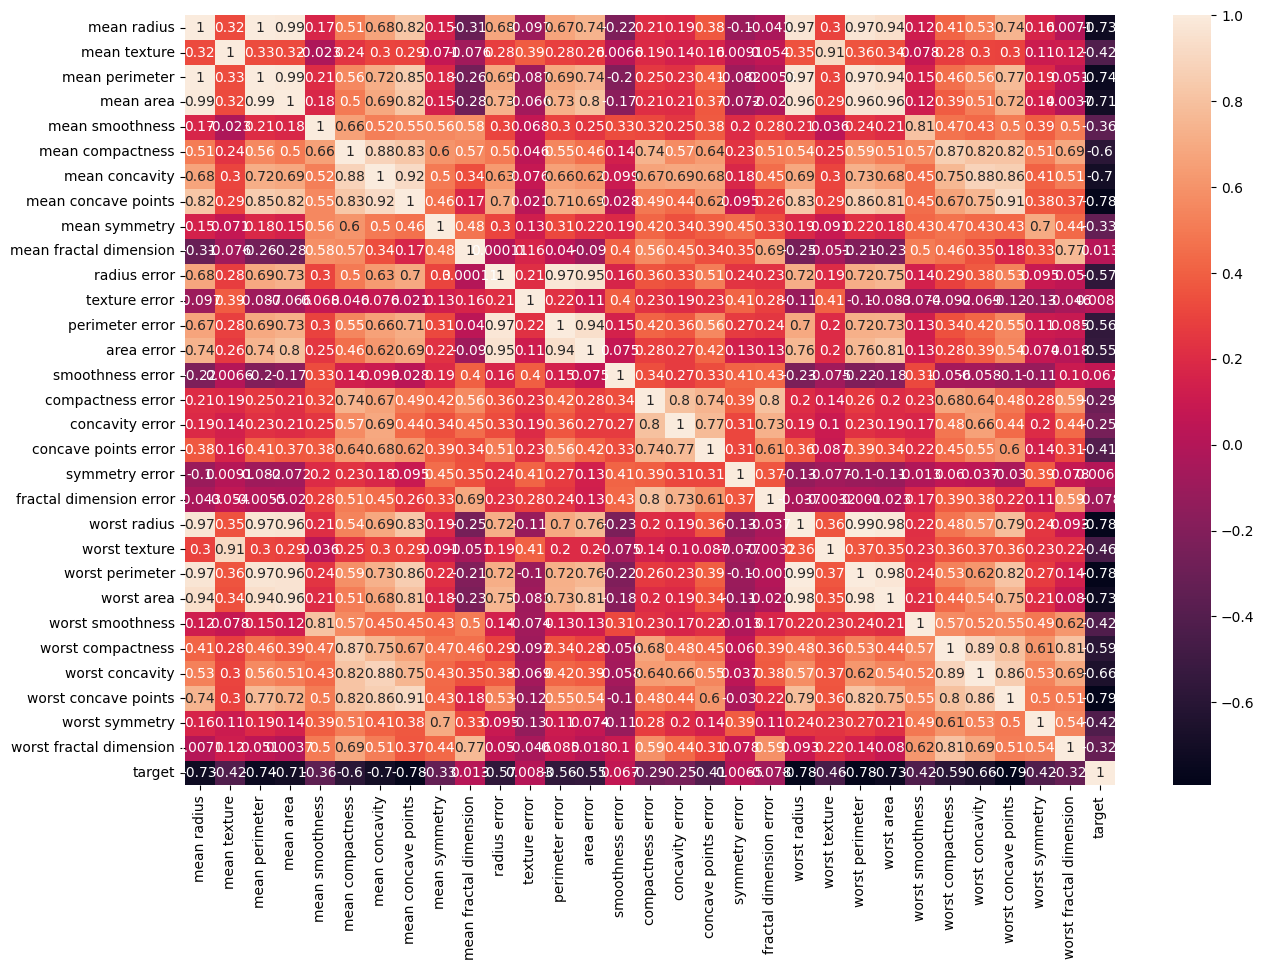

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

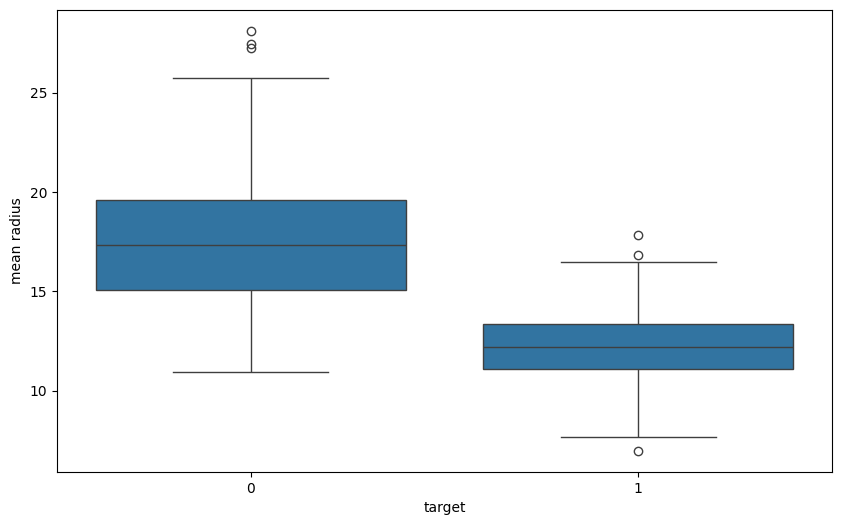

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="target", y="mean radius", data=df)
plt.show()

2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.



- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF


In [7]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
class_names = cancer.target_names

# Configuración del modelo y validación cruzada
svm = SVC(kernel='rbf', random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()

# Listas para almacenar métricas
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(X, y):
    # Dividir los datos
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Escalar los datos
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Entrenar y predecir
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Calcular métricas
    precision_scores.append(precision_score(y_test, y_pred, average=None))
    recall_scores.append(recall_score(y_test, y_pred, average=None))
    f1_scores.append(f1_score(y_test, y_pred, average=None))

# Calcular promedios
avg_precision = np.mean(precision_scores, axis=0)
avg_recall = np.mean(recall_scores, axis=0)
avg_f1 = np.mean(f1_scores, axis=0)

# Métricas promedio (macro)
macro_precision = np.mean(avg_precision)
macro_recall = np.mean(avg_recall)
macro_f1 = np.mean(avg_f1)

# Reportar resultados por clase
print("\nMétricas por clase:")
for i, class_name in enumerate(class_names):
    print(f"\nClase '{class_name}':")
    print(f"  Precisión: {avg_precision[i]:.4f}")
    print(f"  Recall:    {avg_recall[i]:.4f}")
    print(f"  F1-score:  {avg_f1[i]:.4f}")

# Reportar métricas promedio
print("\nMétricas promedio (macro):")
print(f"  Precisión: {macro_precision:.4f}")
print(f"  Recall:    {macro_recall:.4f}")
print(f"  F1-score:  {macro_f1:.4f}")


Métricas por clase:

Clase 'malignant':
  Precisión: 0.9810
  Recall:    0.9576
  F1-score:  0.9688

Clase 'benign':
  Precisión: 0.9756
  Recall:    0.9888
  F1-score:  0.9820

Métricas promedio (macro):
  Precisión: 0.9783
  Recall:    0.9732
  F1-score:  0.9754


3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

   
4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.

Distribución de clases: [212 357]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

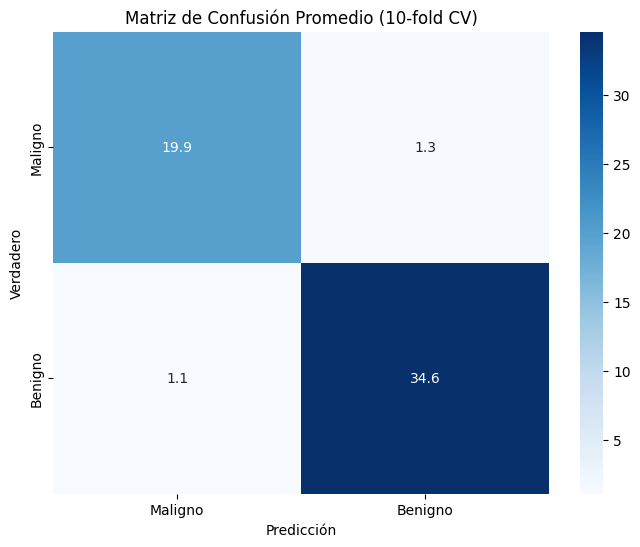


Métricas Promedio:
              precision    recall  f1-score   support

     Maligno       1.00      1.00      1.00        21
     Benigno       1.00      1.00      1.00        35

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar desbalance de clases
print("Distribución de clases:", np.bincount(y))
# Output: Distribución de clases: [212 357] (0: maligno, 1: benigno)

# Configuración de validación cruzada estratificada
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Almacenar matrices de confusión
conf_matrices = []
total_cm = np.zeros((2,2))

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Aplicar SMOTE solo en el conjunto de entrenamiento
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)

    # Entrenar modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_res, y_res)

    # Predecir y almacenar matriz de confusión
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)
    total_cm += cm

# Calcular matriz de confusión promedio
average_cm = total_cm / n_splits

# Visualizar matriz de confusión promedio
plt.figure(figsize=(8,6))
sns.heatmap(average_cm, annot=True, fmt=".1f", cmap="Blues",
            xticklabels=["Maligno", "Benigno"],
            yticklabels=["Maligno", "Benigno"])
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión Promedio (10-fold CV)')
plt.show()

# Métricas promedio
print("\nMétricas Promedio:")
print(classification_report(y_test, y_pred, target_names=["Maligno", "Benigno"]))

3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.